In [13]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import seaborn as sns

In [14]:
# Load the CSV file into a DataFrame
data = pd.read_csv('/Users/srivarankukatla/Desktop/ML finalass/hand sign/sign_mnist_train/sign_mnist_train.csv')

# Extract labels (target variable) from the first column
labels = data.iloc[:, 0].values

# Extract features from the remaining columns
features = data.iloc[:, 1:].values

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=143)

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

# Normalize pixel values to range [0, 1]
train_features = train_features.astype('float32') / 255.0
test_features = test_features.astype('float32') / 255.0

# Reshape features for CNN input (assuming each feature is a 28x28 pixel image)
train_features = train_features.reshape(train_features.shape[0], 28, 28, 1)
test_features = test_features.reshape(test_features.shape[0], 28, 28, 1)

# Save train and test data and labels as numpy arrays
np.save('train_data.npy', train_features)
np.save('test_data.npy', test_features)
np.save('train_labels.npy', train_labels)
np.save('test_labels.npy', test_labels)

# Create CNN model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

# Add Dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# Output layer
model.add(layers.Dense(26, activation='softmax', dtype='float32'))  # Specify dtype as float32

# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# Display model architecture
model.summary()

# Train the model
history = model.fit(train_features, train_labels, epochs=10, validation_data=(test_features, test_labels))


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 9, 9, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 9, 9, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 3, 3, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97,306 (380.10 KB)

 Trainable params: 96,666 (377.60 KB)

 Non-trainable params: 640 (2.50 KB)

Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7519 - loss: 0.9629 - val_accuracy: 0.9924 - val_loss: 0.0530
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9990 - loss: 0.0159 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9998 - loss: 0.0051 - val_accuracy: 1.0000 - val_loss: 7.4750e-04
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9959 - loss: 0.0190 - val_accuracy: 0.9944 - val_loss: 0.0246
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9983 - loss: 0.0074 - val_accuracy: 0.9998 - val_loss: 7.9606e-04
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 1.0000 - loss: 6.9254e-04 - val_accuracy: 0.9843 - val_loss: 0.0460
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9924 - loss: 0.0231 - val_accuracy: 0.9987 - val_loss: 0.0057
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9999 - loss: 0.001

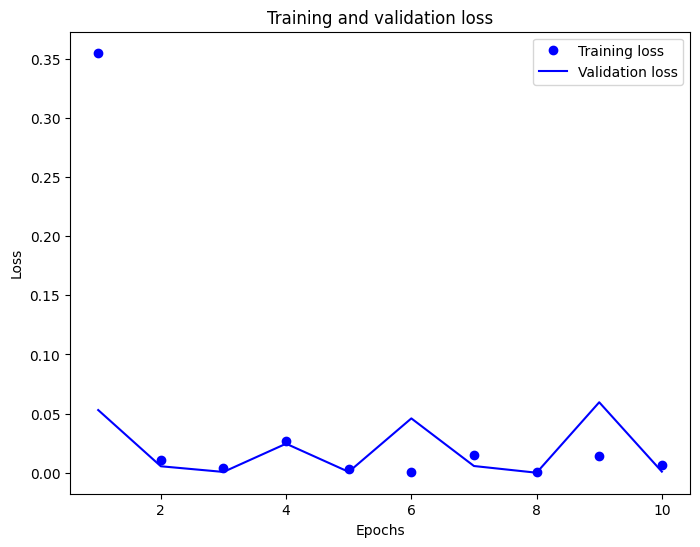

In [16]:
# Plot the loss curves for training and validation.

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

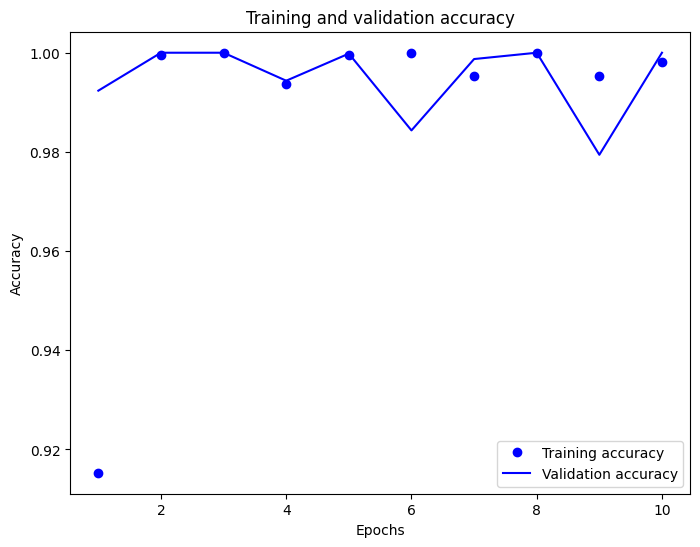

In [17]:
# Plot the accuracy curves for training and validation.

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_features, test_labels)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0012
Test loss: 0.0010232902131974697
Test accuracy: 1.0


172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


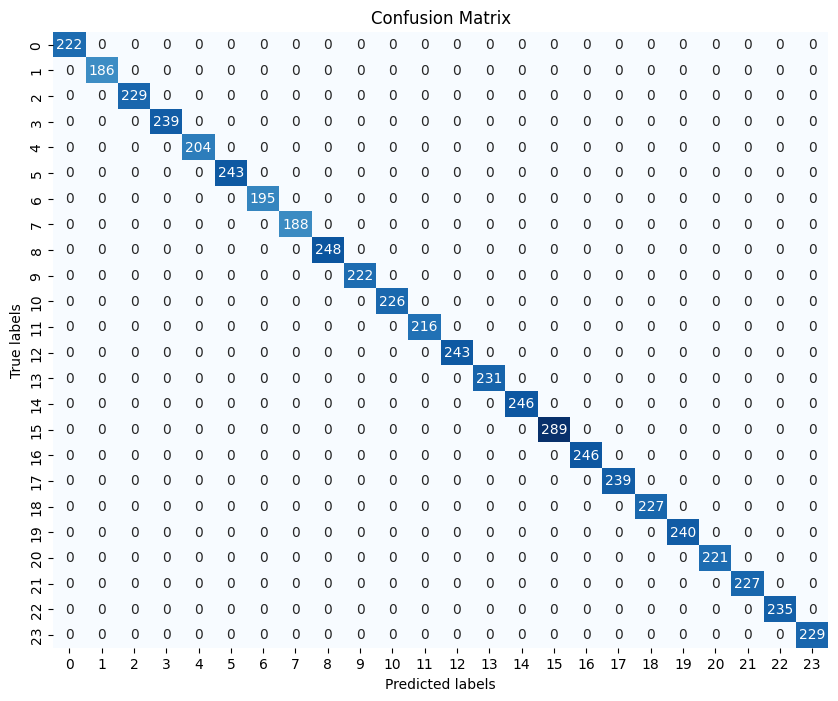

In [19]:
# Plot confusion matrix
test_predictions = np.argmax(model.predict(test_features), axis=-1)
cm = confusion_matrix(test_labels, test_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Training the same model again but with 2 dropout layers this time, the 2nd one with rate=0.3

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=143)

# Normalize pixel values to range [0, 1]
train_features = train_features.astype('float32') / 255.0
test_features = test_features.astype('float32') / 255.0

# Reshape features for CNN input (assuming each feature is a 28x28 pixel image)
train_features = train_features.reshape(train_features.shape[0], 28, 28, 1)
test_features = test_features.reshape(test_features.shape[0], 28, 28, 1)

# Save train and test data and labels as numpy arrays
np.save('train_data.npy', train_features)
np.save('test_data.npy', test_features)
np.save('train_labels.npy', train_labels)
np.save('test_labels.npy', test_labels)

# Create CNN model
model2 = tf.keras.models.Sequential()

model2.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(128, activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())

# Add Dropout layer
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.Dropout(0.3))

# Output layer
model2.add(layers.Dense(26, activation='softmax', dtype='float32'))  # Specify dtype as float32

# Compile the model
model2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# Display model architecture
model2.summary()

# Train the model
history = model2.fit(train_features, train_labels, epochs=10, validation_data=(test_features, test_labels))


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 9, 9, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 9, 9, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 3, 3, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97,306 (380.10 KB)

 Trainable params: 96,666 (377.60 KB)

 Non-trainable params: 640 (2.50 KB)

Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6073 - loss: 1.4564 - val_accuracy: 0.9818 - val_loss: 0.1446
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9916 - loss: 0.0576 - val_accuracy: 0.9969 - val_loss: 0.0169
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9977 - loss: 0.0207 - val_accuracy: 0.9794 - val_loss: 0.0772
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9932 - loss: 0.0316 - val_accuracy: 0.9601 - val_loss: 0.1146
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9979 - loss: 0.0118 - val_accuracy: 0.9995 - val_loss: 0.0020
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9978 - loss: 0.0109 - val_accuracy: 0.9330 - val_loss: 0.2071
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9942 - loss: 0.0202 - val_accuracy: 0.9978 - val_loss: 0.0045
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9989 - loss: 0.0057 - val_accu

In [21]:
# Evaluate the model
test_loss, test_acc = model2.evaluate(test_features, test_labels)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 4.0577e-04
Test loss: 0.000495829270221293
Test accuracy: 1.0
